In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_tweedie_deviance, mean_absolute_error, r2_score

In [25]:
from sklearn import tree

In [4]:
df = pd.read_csv("processed_screen_time_vs_mental_wellness.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   359 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    int64  
 11  productivity_0_100           400 non-null    int64  
 12  mental_wellness_index_0_100  400 non-null    float64
 13  exercise_hours      

In [7]:
df = df.select_dtypes(include=["object"]).drop("user_id", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              400 non-null    object
 1   occupation          359 non-null    object
 2   work_mode           400 non-null    object
 3   age_group           400 non-null    object
 4   screen_time_group   400 non-null    object
 5   work_time_group     400 non-null    object
 6   leisure_time_group  400 non-null    object
 7   sleep_hours_group   400 non-null    object
 8   productivity_group  400 non-null    object
 9   wellness_group      400 non-null    object
dtypes: object(10)
memory usage: 31.4+ KB


In [8]:
X = df.drop("wellness_group", axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              400 non-null    object
 1   occupation          359 non-null    object
 2   work_mode           400 non-null    object
 3   age_group           400 non-null    object
 4   screen_time_group   400 non-null    object
 5   work_time_group     400 non-null    object
 6   leisure_time_group  400 non-null    object
 7   sleep_hours_group   400 non-null    object
 8   productivity_group  400 non-null    object
dtypes: object(9)
memory usage: 28.3+ KB


In [9]:
Y = df["wellness_group"]
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 400 entries, 0 to 399
Series name: wellness_group
Non-Null Count  Dtype 
--------------  ----- 
400 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


In [ ]:
pipe = Pipeline([
    ("scale", OneHotEncoder()),
    ("model", tree.DecisionTreeClassifier())
])
pipe.get_params()

{'memory': None,
 'steps': [('scale', OneHotEncoder()), ('model', DecisionTreeClassifier())],
 'transform_input': None,
 'verbose': False,
 'scale': OneHotEncoder(),
 'model': DecisionTreeClassifier(),
 'scale__categories': 'auto',
 'scale__drop': None,
 'scale__dtype': numpy.float64,
 'scale__feature_name_combiner': 'concat',
 'scale__handle_unknown': 'error',
 'scale__max_categories': None,
 'scale__min_frequency': None,
 'scale__sparse_output': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__monotonic_cst': None,
 'model__random_state': None,
 'model__splitter': 'best'}

In [16]:
mod = GridSearchCV(estimator=pipe,
                   param_grid = {
                        "model__criterion": ["gini", "entropy"],
                        "model__max_depth": [None, 3, 5, 8, 12],
                        "model__min_samples_split": [2, 5, 10],
                        "model__min_samples_leaf": [1, 2, 4],
                        "model__max_features": [None, "sqrt", "log2"],
                   },
                   cv=3)

In [17]:
mod.fit(X, Y)
pd.DataFrame(mod.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
62,0.005499,0.000887,0.003029,0.000529,gini,5,None,4,10,"{'model__criterion': 'gini', 'model__max_depth...",0.813433,0.87218,0.857143,0.847585,0.024918,1
61,0.006464,0.001940,0.003277,0.000618,gini,5,None,4,5,"{'model__criterion': 'gini', 'model__max_depth...",0.813433,0.87218,0.857143,0.847585,0.024918,1
169,0.005049,0.000684,0.003009,0.000325,entropy,3,None,4,5,"{'model__criterion': 'entropy', 'model__max_de...",0.835821,0.87218,0.827068,0.845023,0.019533,3
165,0.004891,0.000302,0.002934,0.000461,entropy,3,None,2,2,"{'model__criterion': 'entropy', 'model__max_de...",0.835821,0.87218,0.827068,0.845023,0.019533,3
164,0.004834,0.000125,0.003110,0.000259,entropy,3,None,1,10,"{'model__criterion': 'entropy', 'model__max_de...",0.835821,0.87218,0.827068,0.845023,0.019533,3


In [28]:
# One-hot encode X into a usable numeric matrix, keep Y as-is
enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
X_enc = enc.fit_transform(X)

clf = tree.DecisionTreeClassifier()
clf.fit(X_enc, Y)

feature_names = enc.get_feature_names_out(X.columns)

print("Encoded X shape:", X_enc.shape)
print("Classes:", clf.classes_)

Encoded X shape: (400, 34)
Classes: ['Favorable' 'Not Favorable']


[Text(0.6, 0.9, 'productivity_group_Very High <= 0.5\ngini = 0.5\nsamples = 400\nvalue = [199.0, 201.0]\nclass = Not Favorable'),
 Text(0.4, 0.7, 'productivity_group_High <= 0.5\ngini = 0.446\nsamples = 301\nvalue = [101, 200]\nclass = Not Favorable'),
 Text(0.5, 0.8, 'True  '),
 Text(0.2, 0.5, 'productivity_group_Low <= 0.5\ngini = 0.234\nsamples = 200\nvalue = [27, 173]\nclass = Not Favorable'),
 Text(0.1, 0.3, 'sleep_hours_group_Short <= 0.5\ngini = 0.357\nsamples = 99\nvalue = [23, 76]\nclass = Not Favorable'),
 Text(0.05, 0.1, '\n  (...)  \n'),
 Text(0.15, 0.1, '\n  (...)  \n'),
 Text(0.3, 0.3, 'screen_time_group_Low <= 0.5\ngini = 0.076\nsamples = 101\nvalue = [4, 97]\nclass = Not Favorable'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.35, 0.1, '\n  (...)  \n'),
 Text(0.6, 0.5, 'screen_time_group_High <= 0.5\ngini = 0.392\nsamples = 101\nvalue = [74, 27]\nclass = Favorable'),
 Text(0.5, 0.3, 'age_group_Younger <= 0.5\ngini = 0.314\nsamples = 77\nvalue = [62, 15]\nclass = Favorabl

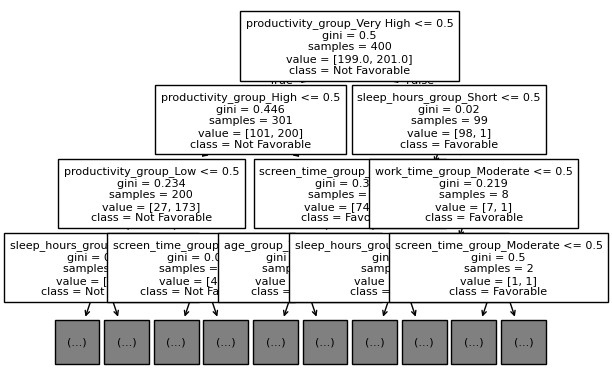

In [29]:
tree.plot_tree(
    clf,
    feature_names=feature_names,
    class_names=clf.classes_,
    max_depth=3, 
    fontsize=8)